<h1 style="color:blue; font-size:36px;">Projet Machine Learning 4A</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
data=pd.read_csv('global-data-on-sustainable-energy.csv')
data.shape
#data['Value_co2_emissions_kt_by_country'].groupby(['Entity'])
#data['Value_co2_emissions_kt_by_country'].groupby(data['Entity']).sum().sort_values(ascending=False)
data.isna().sum().sum()


6978

### <span style="color:blue">**I. Nettoyage des données** </span>

#### <span style="color:blue">**I.1 Suppression des NAN** </span>

#### Grace à la statistique "count", nous constatons que les variables n'ont pas toutes le meme nombre d'observations indinquant ainsi la présence de données manquantes

In [4]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Renewables (% equivalent primary energy)                            58.563990
Financial flows to developing countries (US $)                      57.248561
Renewable-electricity-generating-capacity-per-capita                25.513839
Value_co2_emissions_kt_by_country                                   11.729241
gdp_growth                                                           8.687312
gdp_per_capita                                                       7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Renewable energy share in the total final energy consumption (%)     5.316525
Access to clean fuels for cooking                                    4.631406
Electricity from nuclear (TWh)                                       3.453001
Low-carbon electricity (% electricity)                               1.151000
Electricity from renewables (TWh)                                    0.575500
Electricity from fossil fuels (TWh)                             

#### Nous allons retirer les variables Renewables, Financial flows to developing countries et Renewable-electricity-generating-capacity-per-capita en raison de leur taux de données manquantes, situé entre 25 et 60 %. Ensuite, nous éliminerons tous les individus ayant des valeurs non disponibles (NaN) pour les variables restantes. il nous reste ainsi 2868 individus avec 18 variables

In [5]:
data.drop(['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'],axis=1,inplace=True)

In [6]:
data.dropna(axis=0,inplace=True)
data.shape

(2868, 18)

In [7]:
data.iloc[:,14]=data.iloc[:,14].str.replace(',','') #on remplace les virgule de la colonne Density par un espace
data.iloc[:, 14] = pd.to_numeric(data.iloc[:, 14], errors='coerce')

#### <span style="color:blue">**I.2 Conversion des variables 'Year' et 'Entity'** </span>

In [8]:
data['Year'] = data['Year'].astype('category')
data.rename(columns={data.columns[14]: 'Density'}, inplace=True)#renommer la colonne Density pour faciliter l'accés à la variable
data['Density']= pd.to_numeric(data['Density'], errors='coerce')


In [9]:
# Regrouper les émissions de CO2 par pays
co2_by_country = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()

# Trier les pays par ordre décroissant en fonction des émissions de CO2
co2_by_country_sorted = co2_by_country.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)

# Afficher les résultats
print(co2_by_country_sorted)

                    Entity  Value_co2_emissions_kt_by_country
27                   China                       1.527328e+08
142          United States                       1.065908e+08
62                   India                       3.267958e+07
68                   Japan                       2.367469e+07
50                 Germany                       1.547289e+07
..                     ...                                ...
35                Djibouti                       2.520000e+03
145                Vanuatu                       2.460000e+03
114  Sao Tome and Principe                       1.860000e+03
71                Kiribati                       1.190000e+03
92                   Nauru                       5.300000e+02

[148 rows x 2 columns]


#### Les 5 pays les plus émetteurs de CO2 sont: La chine, les etats unis,l'inde, le japon et L'Allmagne

In [10]:
Value_co2_emissions_kt_by_country=np.log(data['Value_co2_emissions_kt_by_country'])
data.drop(['Value_co2_emissions_kt_by_country'],axis=1,inplace=True)


In [11]:
Value_co2_emissions_kt_by_country.reset_index(drop=True,inplace=True)
Value_co2_emissions_kt_by_country.index

RangeIndex(start=0, stop=2868, step=1)

In [12]:
data.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

### <span style="color:blue">**II. Analyse unidimentionnelle** </span>

#### <span style="color:blue">*II.1 Variables qualitatives* </span>

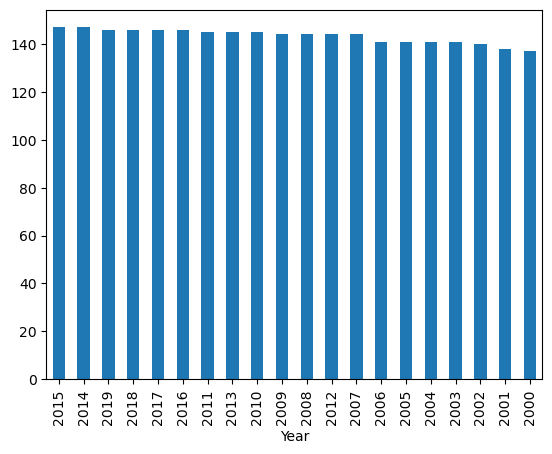

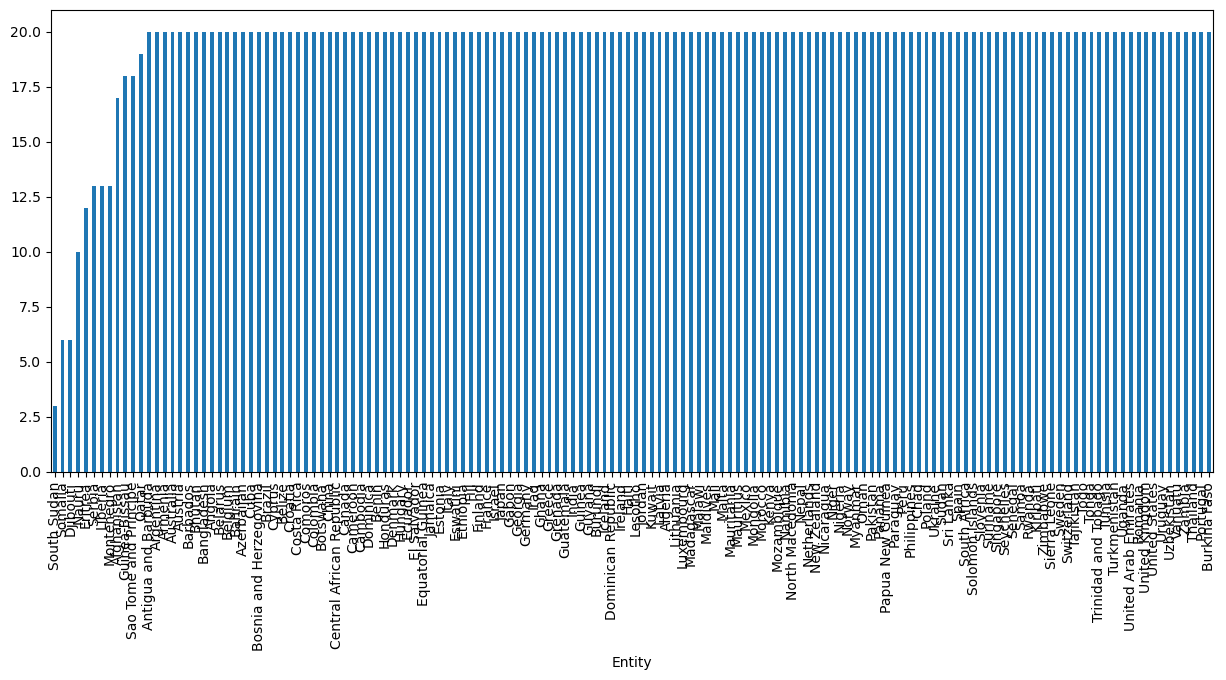

In [13]:
data['Year'].value_counts().plot.bar()
plt.figure(figsize=(15,6))

data['Entity'].value_counts().sort_values(ascending=True).plot.bar()
plt.tick_params(axis='x', rotation=90)

#### Nous observons des disparités dans le nombre d'observations pour chaque année. Les années les plus anciennes présentent moins d'observations que les plus récentes, ce qui peut indiquer une amélioration dans la collecte des données au fil du temps. De plus, il est important de noter que nous n'avons pas le même nombre d'observations pour chaque pays. Certains pays, comme le South Sudan, ont significativement moins d'observations par rapport aux autres, ce qui pourrait refléter des lacunes dans la disponibilité des données ou des déficultés dans la collecte d'informations dans ces régions

#### <span style="color:blue">*II.2 Variables quantitatives* </span>

In [14]:
data1=data.iloc[:,2:] #On extrait que les variables quantitatives
data1.shape

(2868, 14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Access to electricity (% of population)'),
  Text(1, 0, 'Access to clean fuels for cooking'),
  Text(2, 0, 'Renewable energy share in the total final energy consumption (%)'),
  Text(3, 0, 'Electricity from nuclear (TWh)'),
  Text(4, 0, 'Electricity from renewables (TWh)'),
  Text(5, 0, 'Low-carbon electricity (% electricity)'),
  Text(6, 0, 'Primary energy consumption per capita (kWh/person)'),
  Text(7, 0, 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'),
  Text(8, 0, 'gdp_growth'),
  Text(9, 0, 'gdp_per_capita'),
  Text(10, 0, 'Density'),
  Text(11, 0, 'Land Area(Km2)'),
  Text(12, 0, 'Latitude'),
  Text(13, 0, 'Longitude')])

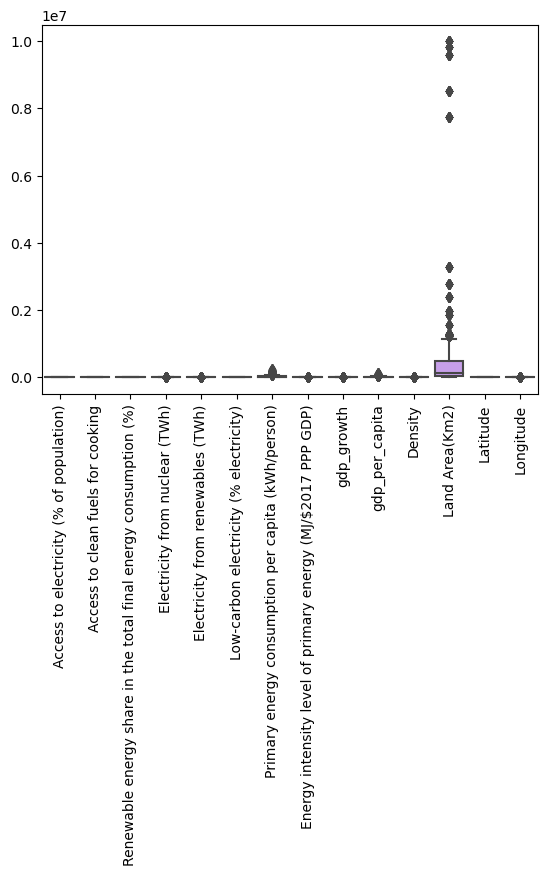

In [15]:
sns.boxplot(data1)
plt.xticks(rotation=90)

#### Nous notons que nos variables présentent non seulement  unités de mesure variées, mais aussi des échelles différentes. Certaines variables ont une importance relative plus élevée que d'autres. Afin d'homogénéiser nos données on va les centrer et les reduire

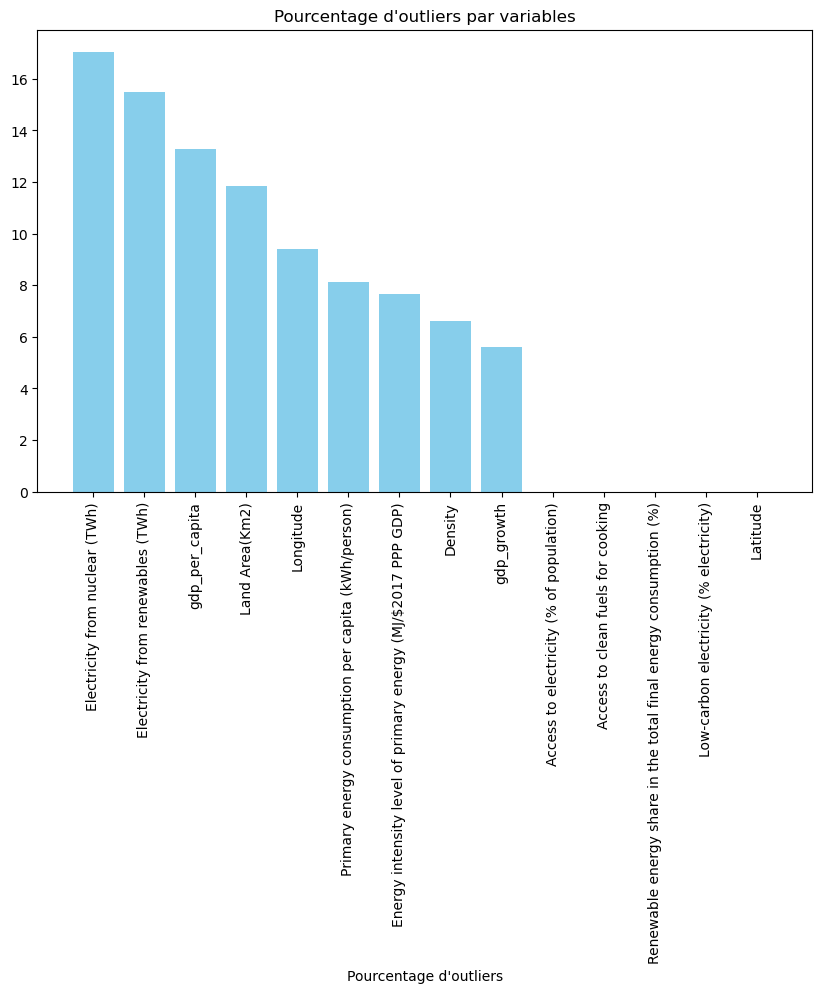

In [16]:

def percent_outliers(data):
    percent_outliers_list = []
    for i in range(data.shape[1]): 
            q1 = np.percentile(data.iloc[:, i], 25)
            q3 = np.percentile(data.iloc[:, i], 75)
            iqr = q3 - q1
            bornes_inf = q1 - 1.5 * iqr
            bornes_sup = q3 + 1.5 * iqr
            outliers = data.iloc[:, i][(data.iloc[:, i] < bornes_inf) | (data.iloc[:, i] > bornes_sup)]
            percent_outliers = 100 * len(outliers) / len(data.iloc[:, i])
            percent_outliers_list.append((data.columns[i], percent_outliers))
    return percent_outliers_list

pourcentages_outliers = percent_outliers(data1)

# Tri de la liste par ordre croissant en fonction du pourcentage d'outliers
pourcentages_outliers_tries = sorted(pourcentages_outliers, key=lambda x: x[1],reverse=True)


# Séparation des colonnes et des pourcentages
colonnes = [colonne for colonne, _ in pourcentages_outliers_tries]
pourcentages = [pourcentage for _, pourcentage in pourcentages_outliers_tries]

# Tracé du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(colonnes, pourcentages, color='skyblue')
plt.xlabel("Pourcentage d'outliers")
plt.title("Pourcentage d'outliers par variables")
plt.xticks(rotation=90)
plt.show()
        
    






On remarque après analyse des boxplot qu’il y'a beacoup d'outliers au niveau des variables 'Electricity from fossil fuels', 'Electricity from nuclear' et 'Electricity from renewables'. Il contiennent plus 15% de valeurs aberrantes. Il est plausible que dans certains pays, ces sources d'énergie soient très abondantes et largement utilisées, ce qui peut entraîner des fluctuations extrêmes dans les données.

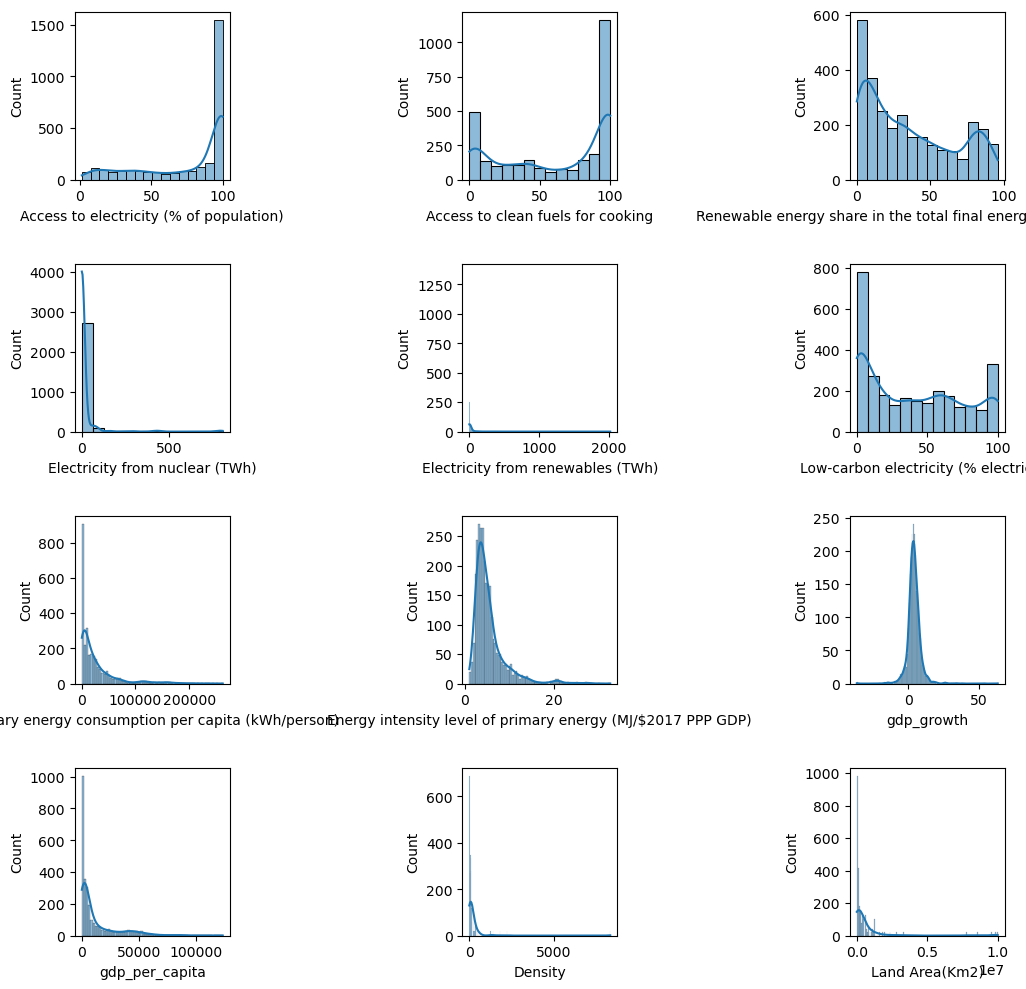

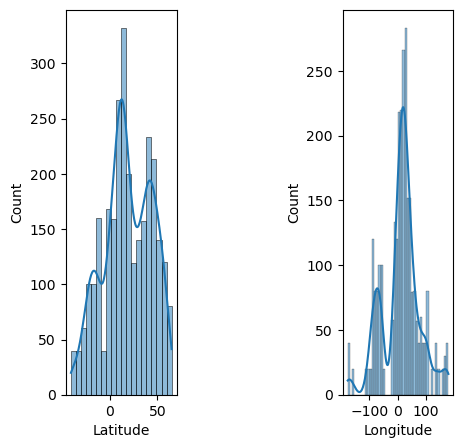

In [17]:
fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(data1.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(data1.iloc[:, k], kde=True, ax=ax[j])
    k+=1

In [18]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
data[columns_sqrt] = np.sqrt(data[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["Primary energy consumption per capita (kWh/person)",
               "gdp_per_capita",
               "Density",
               "Land Area(Km2)"]
data[columns_log] = np.log(data[columns_log])

data1=data.iloc[:,2:]


### <span style="color:blue">**II. Analyse multiimentionnelle** </span>

<Axes: >

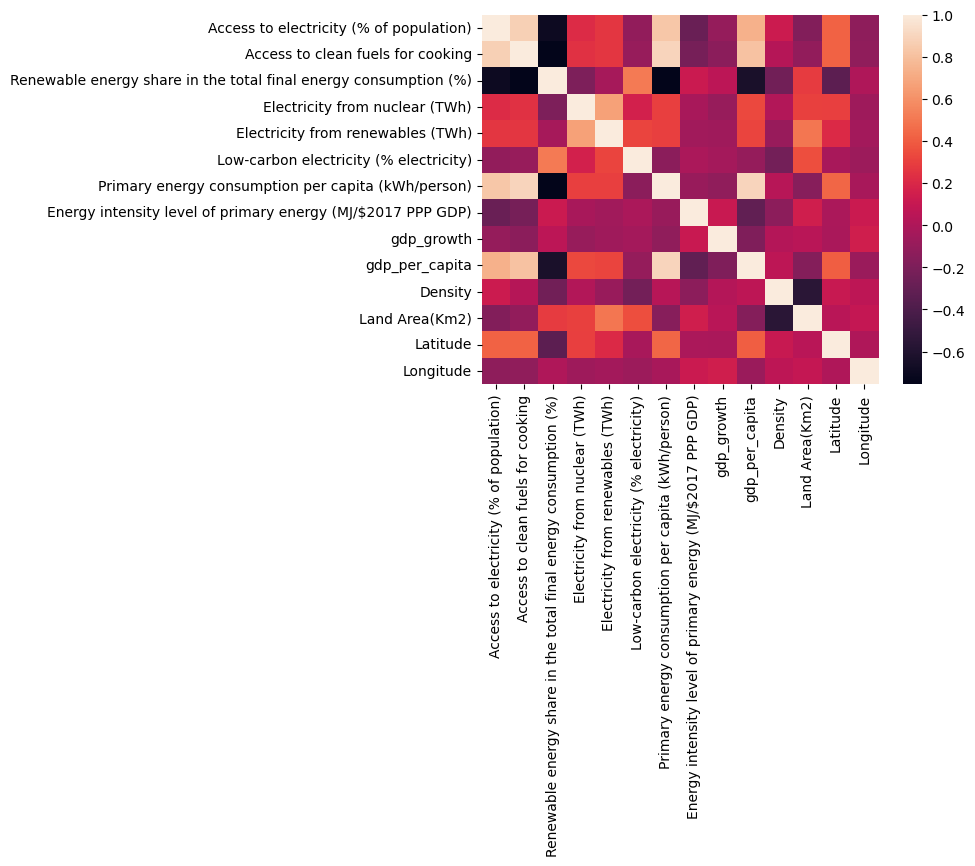

In [19]:
sns.heatmap(data1.corr())

In [20]:

# from scipy.stats import linregress
# res=[]
# for i in range(len(correlation_matrix)):
#     for j in range(i+1, len(correlation_matrix)):
#         correlation_coef = correlation_matrix[i, j]
#         if correlation_coef > 0.8:
#             res.append([data1.columns[i],data1.columns[j]])
# print(res)

# k=0
# fig,ax=plt.subplots(1,2,figsize=(12,6))
# plt.subplots_adjust(wspace=1.5,hspace=0.5)
# j=1
# for i in range(2):
#         # Tracer le nuage de points
#         ax[i].scatter(data1.loc[:, res[k][0]], data1.loc[:, res[k][1]])
    
#         # Calcul de la droite de régression linéaire
#         slope, intercept, _, _, _ = linregress(data1.loc[:, res[k][0]], data1.loc[:, res[k][1]])
#         regression_line = slope * data1.loc[:, res[k][0]] + intercept
    
#         # Tracer la droite de régression linéaire
#         ax[i].plot(slope * data1.loc[:, res[k][0]], regression_line, color='red')
#         # Étiquettes et légendes
#         ax[i].set_xlabel(res[k][0])
#         ax[i].set_ylabel(res[k][1])
#         k+=1
        
#         # Afficher le graphique
# plt.show()

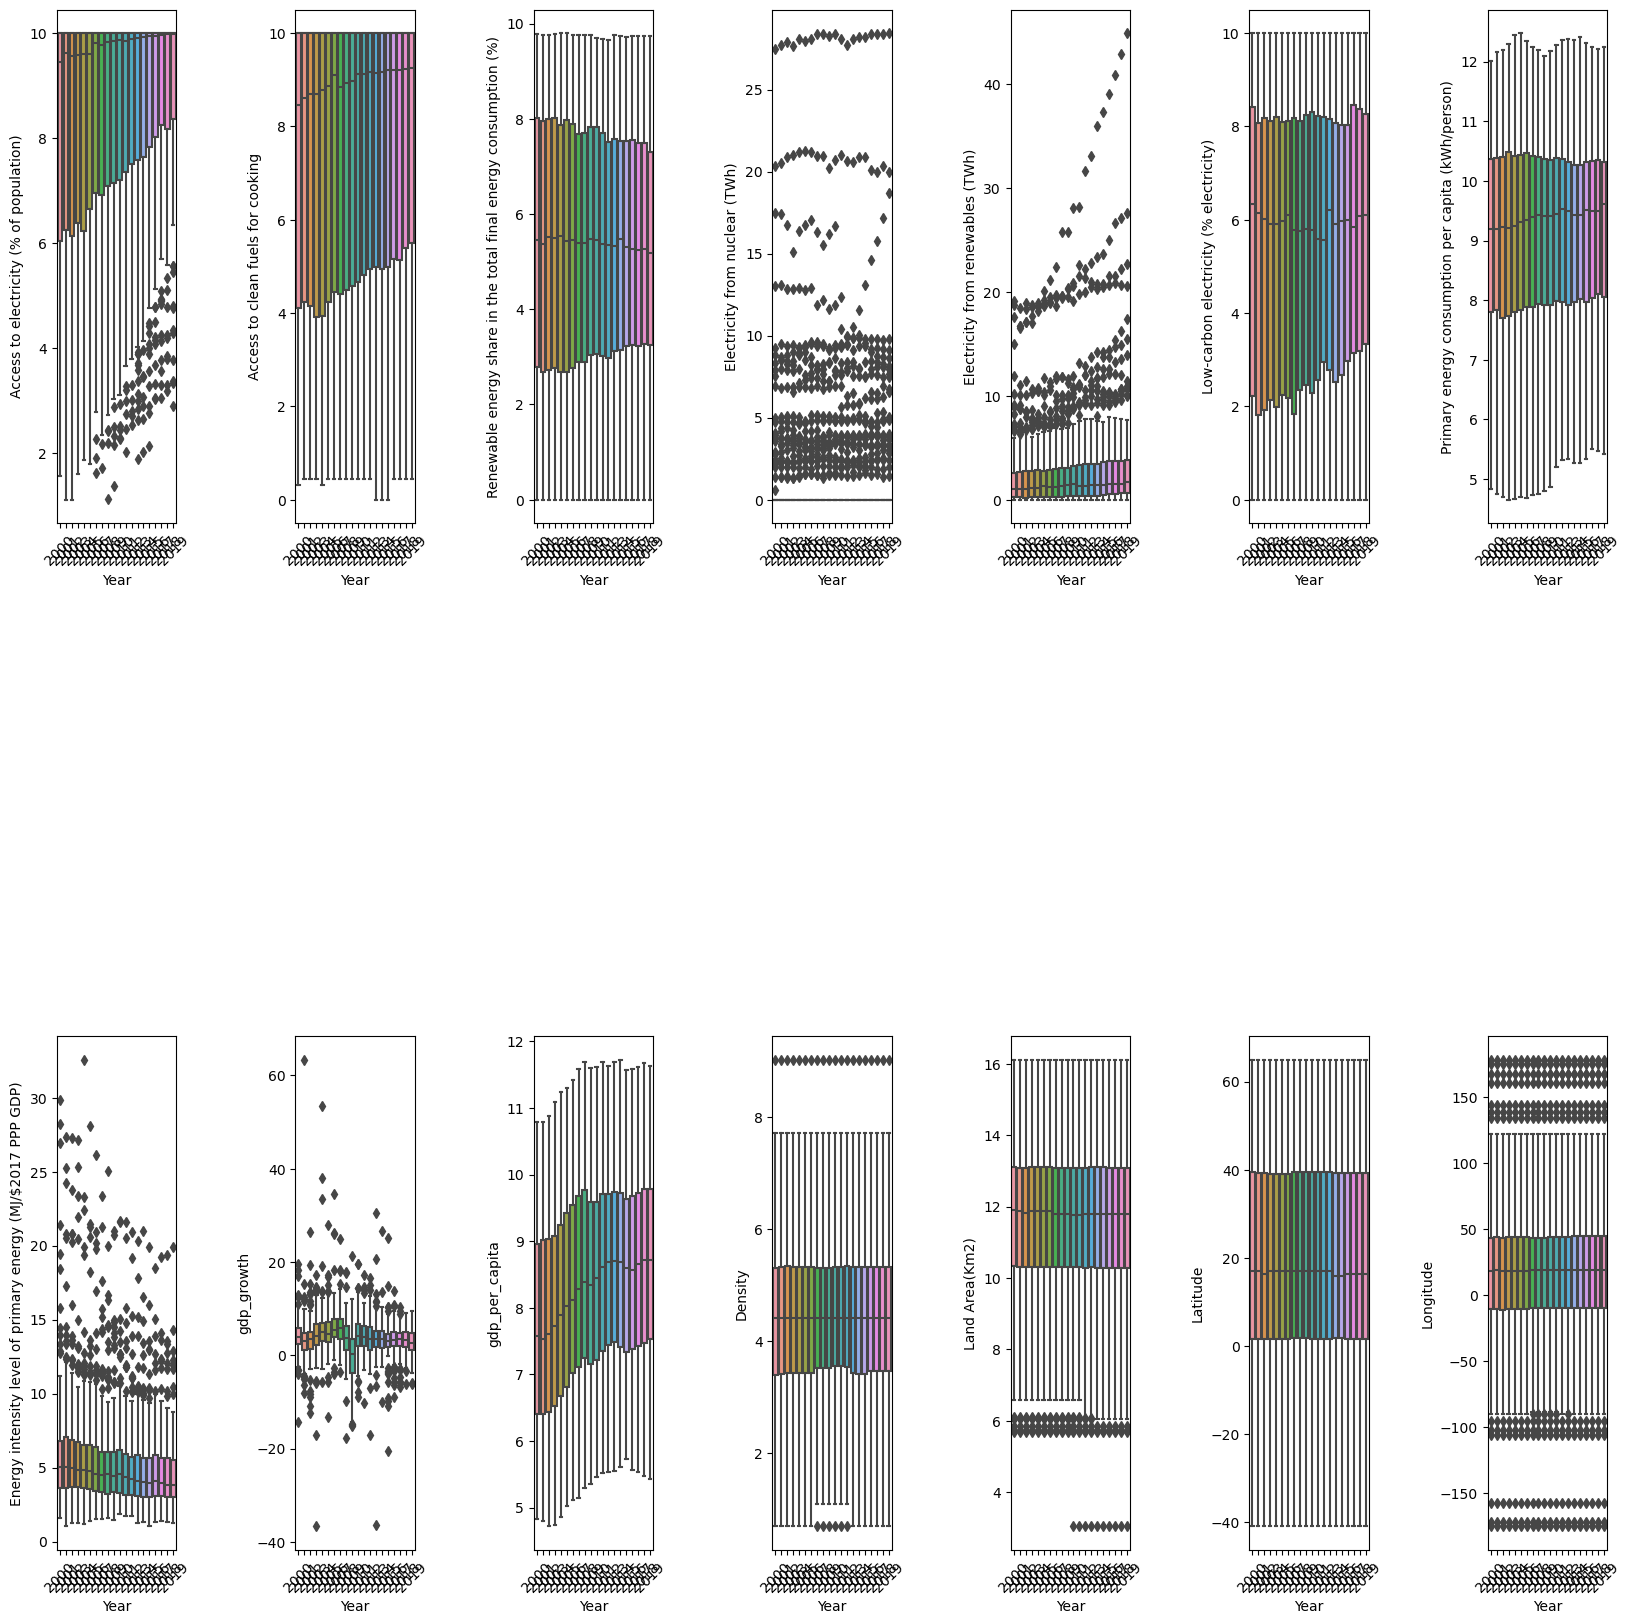

In [21]:
fig,ax=plt.subplots(2,7,figsize=(20,20))
plt.subplots_adjust(hspace=1, wspace=1)
k=0
for i in range(2):
    for j in range(7):
        sns.boxplot(x=data.iloc[:,1],y=data1.iloc[:,k],data=data,ax=ax[i, j])
        ax[i, j].set_xticks(ax[i, j].get_xticks())
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)
        k+=1
plt.show()

In [22]:
from sklearn.decomposition import PCA
data1 = (data1 - data1.mean()) / data1.std()
pca=PCA()
data1_pca=pca.fit(data1).transform(data1)


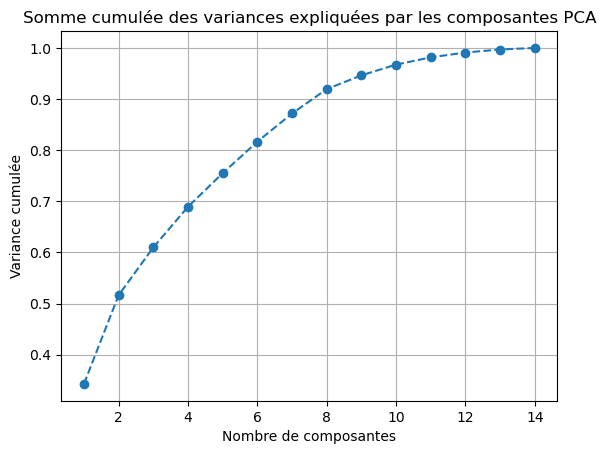

In [23]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tracer la somme cumulée des variances
plt.plot(range(1,15),cumulative_variance,marker='o',linestyle="--")
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Somme cumulée des variances expliquées par les composantes PCA')
plt.grid(True)
plt.show()

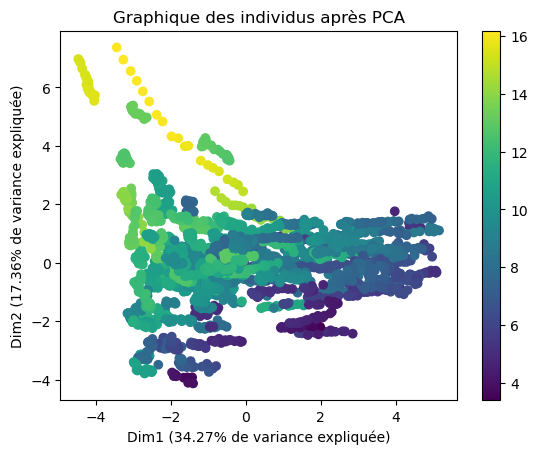

In [24]:
plt.scatter(data1_pca[:,0],data1_pca[:,1], c=Value_co2_emissions_kt_by_country)
plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.2f}% de variance expliquée)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.2f}% de variance expliquée)')
plt.title('Graphique des individus après PCA')
plt.colorbar()
plt.show()


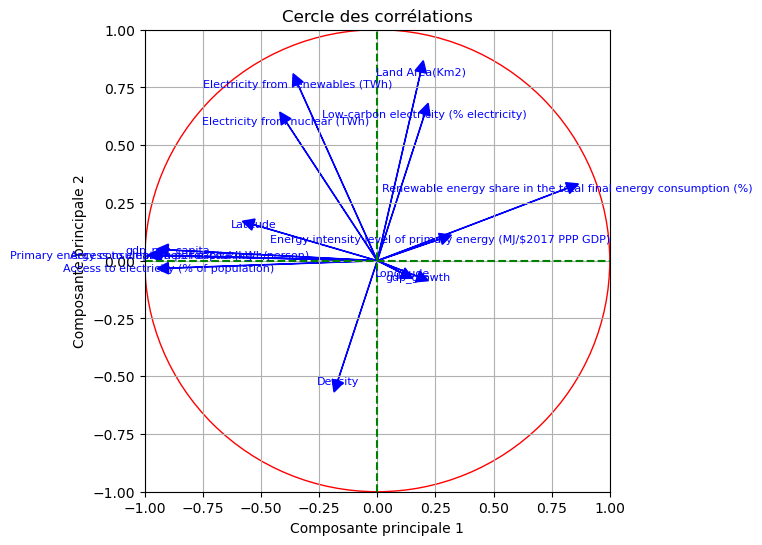

In [25]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig, ax = plt.subplots(figsize=(6, 6))

for i, j, nom in zip(coord1, coord2, data1.columns):
    ax.text(i, j, nom, fontsize=8, ha='center', va='center', color='blue')
    ax.arrow(0, 0, i, j, color='blue', head_width=0.05, head_length=0.05)

ax.set(xlim=(-1, 1), ylim=(-1, 1))
ax.axhline(0, linestyle='dashed', color='green')
ax.axvline(0, linestyle='dashed', color='green')

# Ajout du cercle
cercle = plt.Circle((0, 0), radius=1, color='red', fill=False)
ax.add_patch(cercle)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Cercle des corrélations')

plt.grid(True)
plt.show()


### <span style="color:blue">**III. Modélisations** </span>

In [26]:
data.reset_index(drop=True,inplace=True)
data1.reset_index(drop=True,inplace=True)

In [27]:
dataDum=pd.get_dummies(data[['Year','Entity']])
#data1.reset_index(drop=True, inplace=True)
#dataDum.reset_index(drop=True, inplace=True)


dfC= pd.concat([dataDum, data1], axis=1) #data1 variable quantitatives
dfC.head()

,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,False,False,False,True,False,False,False,False,False,False,...,-0.450633,0.848368,-2.258782,-1.123188,1.062713,-1.963254,-0.181546,0.788417,0.63385,0.83599
1,False,False,False,False,True,False,False,False,False,False,...,-0.461047,0.773961,-2.330927,-1.179095,-0.534097,-1.898120,-0.181546,0.788417,0.63385,0.83599
2,False,False,False,False,False,True,False,False,False,False,...,-0.456508,0.783520,-2.203004,-1.120393,1.578777,-1.812539,-0.181546,0.788417,0.63385,0.83599
3,False,False,False,False,False,False,True,False,False,False,...,-0.449194,1.006939,-2.088298,-1.095235,0.314722,-1.758263,-0.181546,0.788417,0.63385,0.83599
4,False,False,False,False,False,False,False,True,False,False,...,-0.434048,1.052726,-1.996101,-1.086849,2.137714,-1.562128,-0.181546,0.788417,0.63385,0.83599


In [28]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

scaler = StandardScaler()  



XTrain, XTest, YTrain, YTest = train_test_split(dfC, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=11)
scaler.fit(XTrain)
Xr_train = scaler.transform(XTrain)

Xr_test = scaler.transform(XTest)

#### <span style="color:blue">**III.A Regression linéaire** </span>

#### <span style="color:blue">**III.A.1 Modèle sans selection** </span>

In [29]:
from sklearn.linear_model import LinearRegression
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)



# Making predictions on the testing set
prev = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)
print("MSE =", mse)
print("R2 =",R2)

MSE = 0.02107749615143755
R2 = 0.9960403957333557


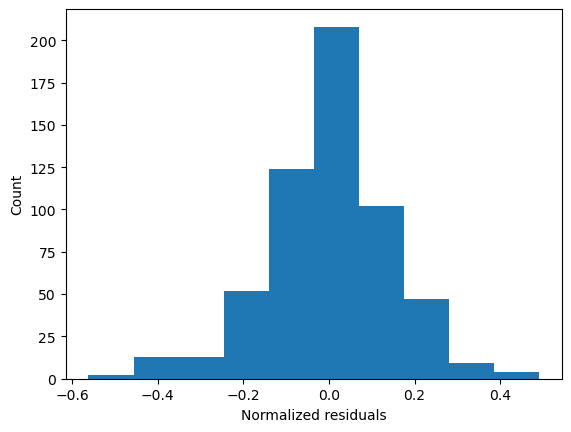

In [30]:
plt.hist(YTest-prev)
plt.ylabel('Count')

plt.xlabel('Normalized residuals')

plt.show()

Text(0, 0.5, 'Residual')

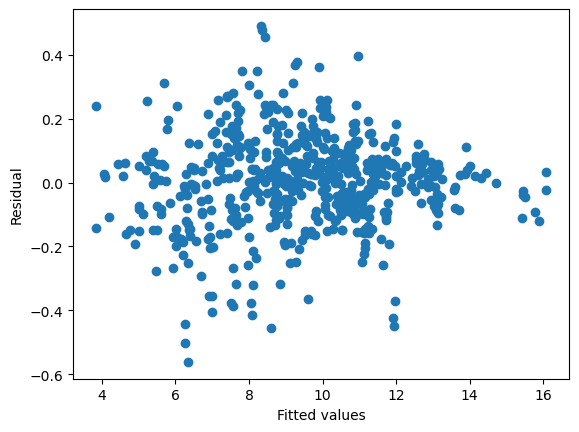

In [31]:
plt.scatter(prev,YTest-prev)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

#### Les variables qualitatives possédant trop de modalités on va passer à un modèle simplifié ou les pays sont organisés par continent et les années par période quadriennale.

In [32]:
data2=data.copy()
data2['Year']=data2['Year'].astype(int)
data2['Periode']=(data2['Year']//4)*4

#Rennommer les années en période:
print(data2['Periode'].unique())





data2.drop(columns=['Year'],inplace=True)


data2.head()


# Afficher les valeurs uniques dans la colonne "Entity"
unique_entities = data2['Entity'].unique()
print(unique_entities)


[2000 2004 2008 2012 2016]
['Afghanistan' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'China'
 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Kiribati' 'Kuwait' 'Latvia' 'Lesotho' 'Liberia'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Maldives' 'Mali' 'Malta'
 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro' 'M

In [33]:
import country_converter as coco


data2['Continent']= coco.convert(names=data2['Entity'], to='continent')



data2.head()

# On trie les données par richesse
#data_subset = data2.drop(columns=['Periode'])
#dataGroupe = data_subset.groupby('Entity').mean().reset_index()
#dataGroupe = dataGroupe.sort_values(by='gdp_per_capita', ascending=False)

# Nombre de groupes
#nombre = 10
#Taille = len(dataGroupe) // nombre  # Utiliser la longueur de dataGroupe pour calculer la taille des groupes

# Créer une liste de groupes pour chaque pays
#groups = [i for i in range(nombre) for _ in range(Taille)]

# Ajouter les pays restants au dernier groupe si le nombre total de pays n'est pas divisible par le nombre de groupes
#groups += [nombre - 1] * (len(dataGroupe) - len(groups))  # Utiliser la longueur de dataGroupe ici

# Ajouter une colonne de groupe au DataFrame
#dataGroupe['Groupe de richesse'] = groups

# Fusionner les données regroupées avec les données d'origine sur la colonne 'Entity'
#data2 = pd.merge(data2, dataGroupe[['Entity', 'Groupe de richesse']], on='Entity', how='left')

#data2.head()



,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude,Periode,Continent
0,Afghanistan,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,5.437941,1.40,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953,2000,Asia
1,Afghanistan,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,5.319253,1.20,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953,2004,Asia
2,Afghanistan,5.038938,3.492850,5.820653,0.0,0.768115,7.964977,5.529703,1.41,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953,2004,Asia
3,Afghanistan,5.542444,3.721559,5.647123,0.0,0.800000,8.728716,5.718411,1.50,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953,2004,Asia
4,Afghanistan,6.004249,3.911521,5.364699,0.0,0.866025,8.885233,5.870087,1.53,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953,2004,Asia


In [34]:


# Filtrer le DataFrame pour les États-Unis
usa_row = data2[data2['Entity'] == 'United States']

# Vérifier si une ligne correspondant aux États-Unis a été trouvée
if not usa_row.empty:
    # Récupérer le continent des États-Unis à partir de la ligne filtrée
    usa_continent = usa_row['Continent'].iloc[0]
    print("Le continent des États-Unis dans le dataset est:", usa_continent)
else:
    print("Aucune entrée pour les États-Unis dans le dataset.")

Le continent des États-Unis dans le dataset est: America


In [35]:
#Et là on supprimer les pays

data2.drop(columns=['Entity'],inplace=True)


In [36]:
data2.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude,Periode,Continent
0,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,5.437941,1.40,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953,2000,Asia
1,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,5.319253,1.20,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953,2004,Asia
2,5.038938,3.492850,5.820653,0.0,0.768115,7.964977,5.529703,1.41,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953,2004,Asia
3,5.542444,3.721559,5.647123,0.0,0.800000,8.728716,5.718411,1.50,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953,2004,Asia
4,6.004249,3.911521,5.364699,0.0,0.866025,8.885233,5.870087,1.53,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953,2004,Asia


#### Regression linéaire sur les nouvelles données

In [37]:
#Et on reprend la reg Lineaire




data2['Periode'] = pd.Categorical(data2['Periode'])

dataDum1=pd.get_dummies(data2[['Periode','Continent']])

data2.drop(columns=['Continent'],inplace=True)


df= pd.concat([dataDum1, data2], axis=1) #data1 variable quantitatives
print(df.columns.tolist())

scaler = StandardScaler()  



XTrain, XTest, YTrain, YTest = train_test_split(df, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=11)
scaler.fit(XTrain)
Xr_train = scaler.transform(XTrain)

Xr_test = scaler.transform(XTest)



['Periode_2000', 'Periode_2004', 'Periode_2008', 'Periode_2012', 'Periode_2016', 'Continent_Africa', 'Continent_America', 'Continent_Asia', 'Continent_Europe', 'Continent_Oceania', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'gdp_growth', 'gdp_per_capita', 'Density', 'Land Area(Km2)', 'Latitude', 'Longitude', 'Periode']


In [38]:
from sklearn.linear_model import LinearRegression
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)



# Making predictions on the testing set
prev = regLin.predict(Xr_test)

# Calculating mean squared error
mseb = mean_squared_error(YTest, prev)
R2b=r2_score(YTest,prev)
print("MSE nouveau =", mseb)
print("R2 nouveau =",R2b)


print("MSE =", mse)
print("R2 =",R2)

MSE nouveau = 0.10193682482020228
R2 nouveau = 0.9808502165728673
MSE = 0.02107749615143755
R2 = 0.9960403957333557


#### <span style="color:blue">**III.A.2 Regression linéaire Lasso** </span>

In [39]:
from sklearn.linear_model import Lasso
# Fitting the Lasso regression model
regLasso = Lasso()
regLasso.fit(Xr_train, YTrain)

# Making predictions on the testing set
prev = regLasso.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)
print("MSE =", mse)
print("R2 = ",R2)

MSE = 3.548730238784596
R2 =  0.3333379214635521


In [40]:
coef = pd.Series(regLasso.coef_, index = XTrain.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 3 variables et en supprime 22


Text(0, 0.5, 'Residuals')

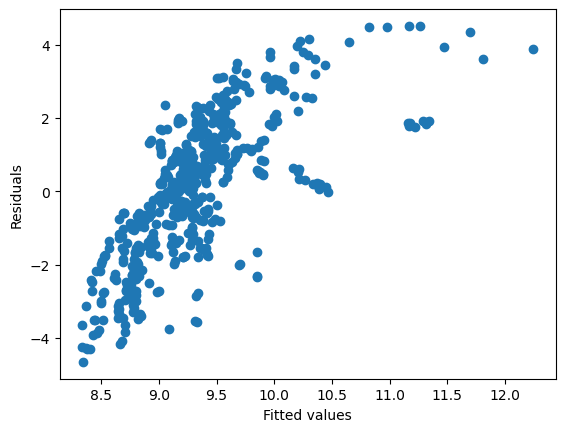

In [41]:
plt.scatter(prev,YTest-prev)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [42]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser

param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.981122, Meilleur paramètre = {'alpha': 0}


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+02, tolerance: 1.325e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [43]:
prev=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,YTest))
print("R2=",r2_score(YTest,prev))
#Le modèle est sur paramétré avec 20

MSE= 0.10184179378086487
R2= 0.9808680690400732


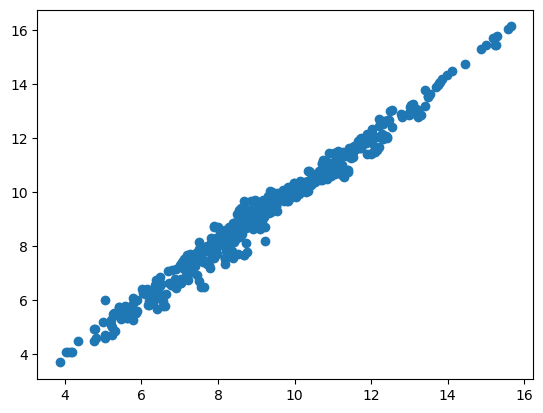

In [44]:
plt.plot(prev,YTest,"o")


#sns.residplot(
#plt.xlabel(u"O3 Prédite")
#plt.ylabel("O3 observee")
plt.show()



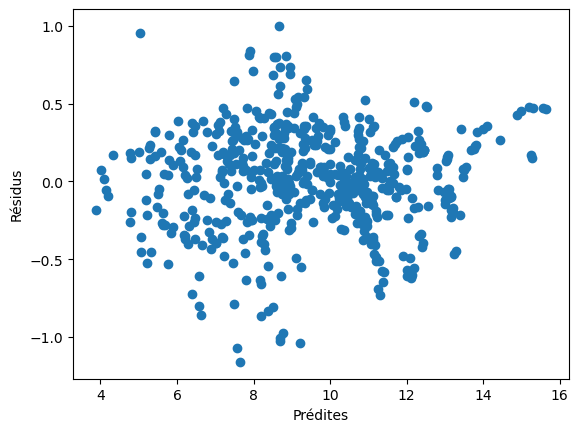

In [45]:
plt.plot(prev,YTest-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
# plt.hlines(0,40,2
plt.show()

In [46]:
coef = pd.Series(regLassOpt.best_estimator_.coef_, index = XTrain.columns)
print("LassoOPT conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

LassoOPT conserve 25 variables et en supprime 0


#### <span style="color:blue"> **III.A.3 Modèle sélection avec le critère BIC**  </span>

In [47]:
A=Value_co2_emissions_kt_by_country.mean()

In [48]:
# # Dénombrement des erreurs par  matrice de confusion
table=pd.crosstab(prev>A,YTest>A)
print(table)

Value_co2_emissions_kt_by_country  False  True 
row_0                                          
False                                272     22
True                                   3    277


### <span style="color:blue"> **IV SVM**  </span>

In [50]:
from sklearn.svm import SVR

param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train, YTrain)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

Best score = 0.019185, Best parameters = {'degree': 3}


In [51]:

param= {'C': [0,5,10,15,100,200],}
svm= GridSearchCV(SVR(epsilon=0.1,kernel='poly'),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_

Meilleur score = 0.004942, Meilleur paramètre = {'C': 10}


MSE= 16932117010616.703


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


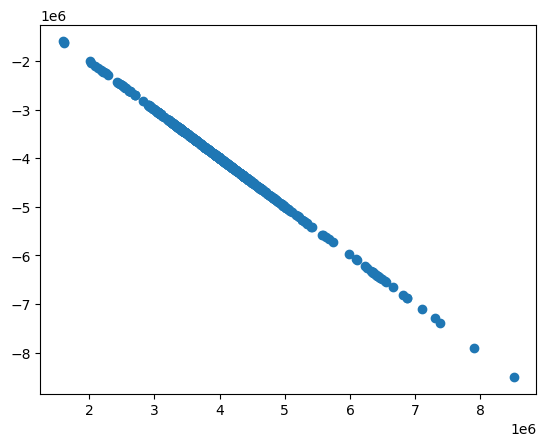

In [52]:
y_chap = svmOpt.predict(XTest)
print("MSE=",mean_squared_error(y_chap,YTest))

plt.scatter(y_chap,YTest-y_chap)

### <span style="color:blue"> **V Cart**  </span>

In [53]:
 from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.012748, Meilleur paramètre = {'max_depth': 16}


In [54]:
treeOpt.score(XTest,YTest)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


-0.5191463427076437

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


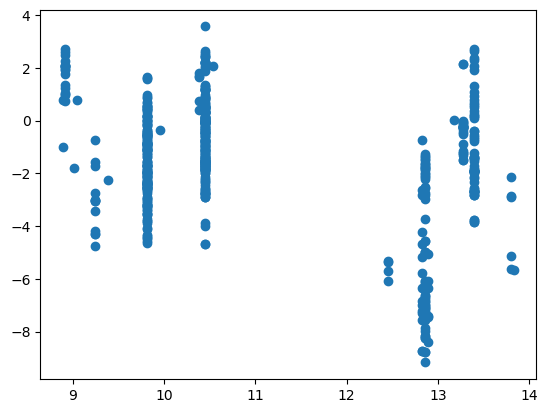

In [55]:
y_chap = treeOpt.predict(XTest)
plt.scatter(y_chap,YTest-y_chap)

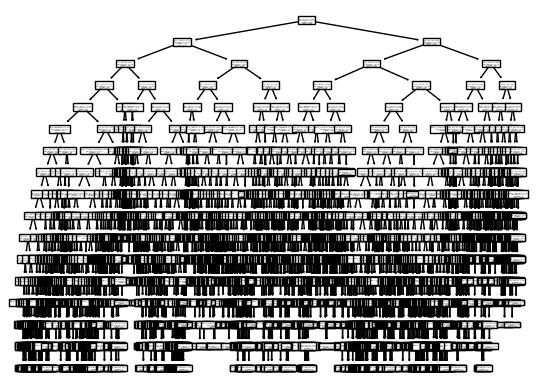

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
treeG=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,YTrain)
plot_tree(treeG,feature_names=dfC.columns.tolist());
plt.show()

In [57]:
 from sklearn.ensemble import RandomForestRegressor 
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(XTrain,YTrain)
#Erreur Out Of Bag
print(1-rfFit.oob_score_)

0.0033382675009193674


In [58]:
 # erreur de prévision sur le test
1-rfFit.score(XTest,YTest)

0.005084174820312759

In [59]:
param=[{"n_estimators":list(range(1,500,50))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.004399, Meilleur paramètre = {'n_estimators': 451}


In [60]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.003722, Meilleur paramètre = {'max_features': 10}


In [61]:
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(dfC.columns[indices[f]], importances[indices[f]])

Year_2014 0.34271402860071803
Entity_Angola 0.17567025444965909
Year_2013 0.16861723536507175
Year_2015 0.09663848675047862
Entity_Algeria 0.0679713766442117
Year_2016 0.04088431643866737
Year_2012 0.03991651937721086
Entity_Afghanistan 0.01760131143333572
Year_2010 0.010939845589589861
Year_2017 0.007884431485225546
Entity_Antigua and Barbuda 0.0078107903804108415
Year_2009 0.0073142828182149325
Year_2019 0.007208526779106805
Year_2011 0.004936006774188669
Entity_Argentina 0.0010620708963204578
Year_2018 0.0010158630422016394
Year_2008 0.0005614662086609317
Year_2007 0.00037939377182426965
Year_2006 0.0002463749071770712
Year_2004 0.00018817909288465007
Year_2005 0.00013527178805682082
Year_2000 0.0001195729552368452
Year_2002 7.512791433062165e-05
Year_2003 6.51462059779124e-05
Year_2001 4.4120331238821675e-05


In [62]:
# définition des paramètres
forest = RandomForestRegressor(n_estimators=351,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True,max_features=12)
# apprentissage
rfFit = forest.fit(XTrain,YTrain)
#Erreur Out Of Bag
print(1-rfFit.oob_score_)



0.0029826905557168715


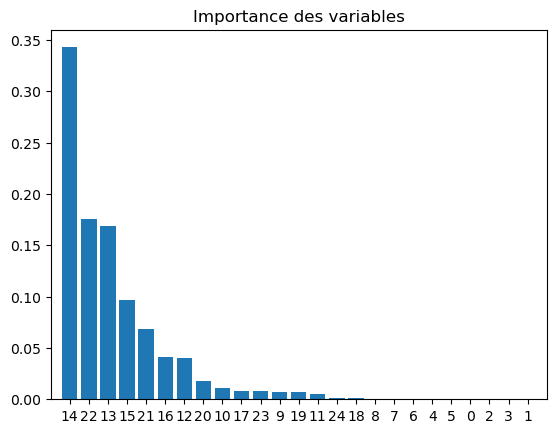

In [63]:
 # Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices]);
plt.xticks(range(Xr_train.shape[1]), indices);
plt.xlim([-1, Xr_train.shape[1]]);
plt.show()

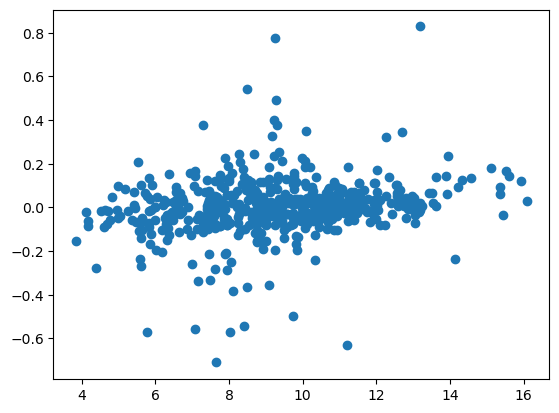

In [64]:
y_chap = forest.predict(XTest)
plt.scatter(y_chap,YTest-y_chap)

### <span style="color:blue"> **VI Réseaux de neurone**  </span>

In [65]:
 from sklearn.neural_network import MLPRegressor
    

In [66]:
 param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]
nnet= GridSearchCV(MLPRegressor(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Meilleur score = 0.019446, Meilleur paramètre = {'hidden_layer_sizes': (8,)}


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(XTest,YTest)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


1191278.0053406258

In [68]:
 # prévision de l'échantillon test



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


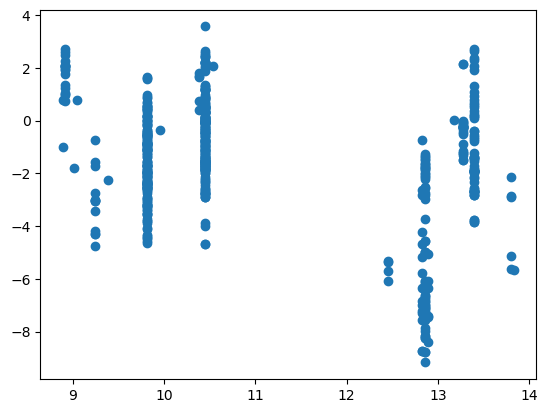

In [69]:
y_chap = treeOpt.predict(XTest)
plt.scatter(y_chap,YTest-y_chap)

### <span style="color:blue"> **VII Données Manquantes**  </span>

In [70]:
data3=pd.read_csv('global-data-on-sustainable-energy.csv')



In [71]:

data3['Year'] = data['Year'].astype('category')
data3.rename(columns={data.columns[14]: 'Density'}, inplace=True)#renommer la colonne Density pour faciliter l'accés à la variable
data3['Density']= pd.to_numeric(data3['Density'], errors='coerce')


In [76]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
data[columns_sqrt] = np.sqrt(data3[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["Primary energy consumption per capita (kWh/person)",
               "gdp_per_capita",
               "Density",
               "Land Area(Km2)"]
data3[columns_log] = np.log(data3[columns_log])



C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [98]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base


In [99]:
from missforest.missforest import MissForest
imputer = MissForest()

Exception: Version mismatch: this is the 'cffi' package version 1.15.1, located in 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\cffi\\api.py'.  When we import the top-level '_cffi_backend' extension module, we get version 1.16.0, located in 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\_cffi_backend.cp311-win_amd64.pyd'.  The two versions should be equal; check your installation.


  Obtaining dependency information for missingpy from https://files.pythonhosted.org/packages/b5/be/998d04d27054b58f0974b5f09f8457778a0a72d4355e0b7ae877b6cfb850/missingpy-0.2.0-py3-none-any.whl.metadata
  Using cached missingpy-0.2.0-py3-none-any.whl.metadata (20 kB)
Using cached missingpy-0.2.0-py3-none-any.whl (49 kB)
  Attempting uninstall: missingpy
    Found existing installation: missingpy 0.2.0
    Uninstalling missingpy-0.2.0:
      Successfully uninstalled missingpy-0.2.0


Retrieving notices: ...working... done
Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-anon-usage-0.4.4  |py311hfc23b7f_100          30 KB
    archspec-0.2.3             |     pyhd3eb1b0_0          47 KB
    arrow-cpp-14.0.2           |       ha81ea56_1         8.5 MB
    astropy-5.3.4              |  py311hd7041d2_0         9.7 MB
    async-timeout-4.0.3        |  py311haa95532_0          14 KB
    autopep8-2.0.4             |     pyhd3eb1b0_0          44 KB
    aws-c-auth-0.6.19          |       h2bbff1b_0          95 KB
    aws-c-cal-0.5.20           |       h2bbff1b_0          41 KB
    aws-c-common-0.8.5         |       h2bbff1b_0         198 KB
    aws-c-compression-0.2.16   |       h2bbff1b_0       

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.c